In [1]:
import pandas_oracle.tools as pt
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.putenv('NLS_LANG', '.UTF8')
conn = pt.open_connection('../oracle\config.yml') 

In [4]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
# 1
#x :서비스 타입
#y :연령대별 판매량

query = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 AMTAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5

'''

In [6]:
df_analysis_age_AMT = pt.query_to_df(query, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)

In [7]:
df_analysis_age_AMT

,SE_NAME,AMT10,AMT20,AMT30,AMT40,AMT50,AMT60,AMTAVG
0,편의점,4.018902e+06,6.202817e+07,6.033447e+07,4.079146e+07,2.163365e+07,8.391088e+06,3.286629e+07
1,치과의원,2.781233e+05,1.042372e+07,1.996577e+07,3.131773e+07,3.633856e+07,3.917750e+07,2.291690e+07
2,일반의원,6.404389e+05,1.345445e+07,2.534392e+07,2.990017e+07,3.087604e+07,2.958614e+07,2.163353e+07
3,의약·의료용품,4.920789e+05,1.133698e+07,2.139950e+07,2.663085e+07,2.926383e+07,3.733858e+07,2.107697e+07
4,슈퍼마켓,8.939552e+05,1.502983e+07,2.471355e+07,3.249443e+07,2.847309e+07,1.986079e+07,2.024427e+07


In [8]:
df_analysis_age_AMT_graph = pd.melt(df_analysis_age_AMT, id_vars = ['SE_NAME'], value_vars=['AMT10', 'AMT20', 'AMT30', 'AMT40', 'AMT50','AMT60'])

In [9]:
df_analysis_age_AMT_graph
df_analysis_age_AMT_graph.columns = ['서비스','나이','판매량']
df_analysis_age_AMT_graph.head()

,서비스,나이,판매량
0,편의점,AMT10,4.018902e+06
1,치과의원,AMT10,2.781233e+05
2,일반의원,AMT10,6.404389e+05
3,의약·의료용품,AMT10,4.920789e+05
4,슈퍼마켓,AMT10,8.939552e+05


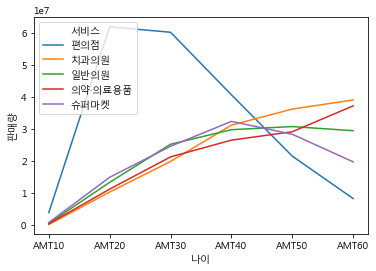

In [10]:
sns.lineplot(x="나이", y="판매량", hue="서비스", data=df_analysis_age_AMT_graph)

In [11]:
# 2
#x :서비스 타입
#y :성별 판매량
query = '''
SELECT *
FROM(SELECT SE_NAME,
       SUM(TS_MALE_AMT) MALE,
       SUM(TS_FEMALE_AMT) FEMALE,
       (SUM(TS_MALE_AMT)+SUM(TS_FEMALE_AMT)) AMTSUM
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
     
Group By SE_NAME
Order By AMTSUM DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [12]:
df_analysis_gender_AMT = pt.query_to_df(query, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)
df_analysis_gender_AMT

,SE_NAME,MALE,FEMALE,AMTSUM
0,편의점,6.473344e+11,3.372739e+11,9.846083e+11
1,슈퍼마켓,2.946996e+11,3.369219e+11,6.316215e+11
2,의약·의료용품,2.609234e+11,2.791945e+11,5.401179e+11
3,치과의원,2.208737e+11,2.205011e+11,4.413748e+11
4,일반의원,1.754565e+11,2.528862e+11,4.283427e+11


In [13]:
df_analysis_gender_AMT_graph = pd.melt(df_analysis_gender_AMT, id_vars = ['SE_NAME'], value_vars=['MALE', 'FEMALE'])
df_analysis_gender_AMT_graph.columns = ['서비스','성별','판매량']
df_analysis_gender_AMT_graph

,서비스,성별,판매량
0,편의점,MALE,6.473344e+11
1,슈퍼마켓,MALE,2.946996e+11
2,의약·의료용품,MALE,2.609234e+11
3,치과의원,MALE,2.208737e+11
4,일반의원,MALE,1.754565e+11
5,편의점,FEMALE,3.372739e+11
6,슈퍼마켓,FEMALE,3.369219e+11
7,의약·의료용품,FEMALE,2.791945e+11
8,치과의원,FEMALE,2.205011e+11
9,일반의원,FEMALE,2.528862e+11


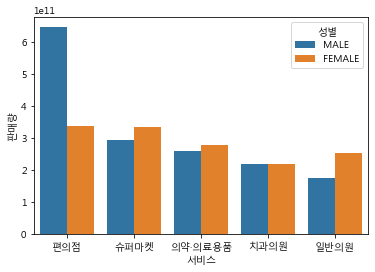

In [14]:
sns.barplot(x = "서비스", y="판매량", hue="성별", data=df_analysis_gender_AMT_graph)

In [14]:
# 3
#x :서비스 타입
#y :연령대별 판매건수

query = '''
SELECT *
FROM(SELECT SE_NAME,
       SUM(TS_10_NUM) AMT10,
       SUM(TS_20_NUM) AMT20,
       SUM(TS_30_NUM) AMT30,
       SUM(TS_40_NUM) AMT40,
       SUM(TS_50_NUM) AMT50,
       SUM(TS_60UP_NUM) AMT60,
       (SUM(TS_10_NUM)+SUM(TS_20_NUM)+SUM(TS_30_NUM)+SUM(TS_40_NUM)+SUM(TS_50_NUM)+SUM(TS_60UP_NUM))/6 AMTSUM
       
FROM AGE_NUM_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      
Group By SE_NAME
Order By AMTSUM DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5

'''

In [15]:
df_analysis_age_NUM = pt.query_to_df(query, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)
df_analysis_age_NUM

,SE_NAME,AMT10,AMT20,AMT30,AMT40,AMT50,AMT60,AMTSUM
0,편의점,5.884838e+06,6.527741e+07,4.915165e+07,3.074763e+07,1.654221e+07,5.918510e+06,2.892037e+07
1,슈퍼마켓,8.548309e+05,1.016406e+07,1.186661e+07,1.245063e+07,1.005542e+07,6.661400e+06,8.675489e+06
2,의약·의료용품,3.565744e+05,5.822973e+06,8.739150e+06,8.382207e+06,7.448423e+06,7.686400e+06,6.405955e+06
3,제과점,5.689533e+05,7.856135e+06,8.220867e+06,6.997335e+06,4.454919e+06,2.278346e+06,5.062759e+06
4,PC방,4.134845e+06,1.773272e+07,2.976040e+06,1.268883e+06,9.601537e+05,1.548237e+05,4.537911e+06


In [16]:
df_analysis_age_NUM_graph = pd.melt(df_analysis_age_NUM, id_vars = ['SE_NAME'], value_vars=['AMT10', 'AMT20', 'AMT30', 'AMT40', 'AMT50','AMT60'])
df_analysis_age_NUM_graph.columns = ['서비스','나이','판매건수']
df_analysis_age_NUM_graph

,서비스,나이,판매건수
0,편의점,AMT10,5.884838e+06
1,슈퍼마켓,AMT10,8.548309e+05
2,의약·의료용품,AMT10,3.565744e+05
3,제과점,AMT10,5.689533e+05
4,PC방,AMT10,4.134845e+06
5,편의점,AMT20,6.527741e+07
6,슈퍼마켓,AMT20,1.016406e+07
7,의약·의료용품,AMT20,5.822973e+06
8,제과점,AMT20,7.856135e+06
9,PC방,AMT20,1.773272e+07


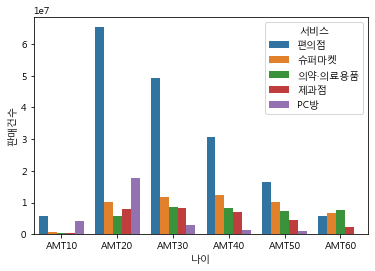

In [17]:
sns.barplot(x = "나이", y="판매건수", hue="서비스", data=df_analysis_age_NUM_graph)

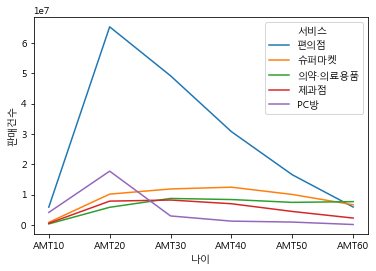

In [18]:
sns.lineplot(x = "나이", y="판매건수", hue="서비스", data=df_analysis_age_NUM_graph)

In [19]:
# 4
#x :서비스 타입
#y :성별 판매건수
query = '''
SELECT *
FROM(SELECT SE_NAME,
       SUM(TS_MALE_NUM) MALE,
       SUM(TS_FEMALE_NUM) FEMALE,
       (SUM(TS_MALE_NUM)+SUM(TS_FEMALE_NUM)) AMTSUM
FROM GENDER_NUM_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
     
Group By SE_NAME
Order By AMTSUM DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''


In [20]:
df_analysis_gender_NUM = pt.query_to_df(query, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)
df_analysis_gender_NUM

,SE_NAME,MALE,FEMALE,AMTSUM
0,편의점,1.110816e+08,6.244014e+07,1.735217e+08
1,슈퍼마켓,2.641505e+07,2.563684e+07,5.205189e+07
2,의약·의료용품,1.756292e+07,2.087250e+07,3.843541e+07
3,제과점,1.163957e+07,1.873617e+07,3.037575e+07
4,PC방,2.228117e+07,4.946270e+06,2.722744e+07


In [21]:
df_analysis_gender_NUM_graph = pd.melt(df_analysis_gender_NUM, id_vars = ['SE_NAME'], value_vars=['MALE', 'FEMALE'])
df_analysis_gender_NUM_graph.columns = ['서비스','성별','판매건수']
df_analysis_gender_NUM_graph

,서비스,성별,판매건수
0,편의점,MALE,1.110816e+08
1,슈퍼마켓,MALE,2.641505e+07
2,의약·의료용품,MALE,1.756292e+07
3,제과점,MALE,1.163957e+07
4,PC방,MALE,2.228117e+07
5,편의점,FEMALE,6.244014e+07
6,슈퍼마켓,FEMALE,2.563684e+07
7,의약·의료용품,FEMALE,2.087250e+07
8,제과점,FEMALE,1.873617e+07
9,PC방,FEMALE,4.946270e+06


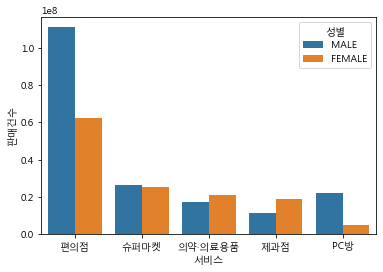

In [22]:
sns.barplot(x = "서비스", y="판매건수", hue="성별", data=df_analysis_gender_NUM_graph)

In [23]:
##@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@분기 적용@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [45]:
# 1 분기적용
#x :서비스 타입
#y :연령대별 판매량

query1 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_QUARTER) QUARTER,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 AMTAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER=1
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5

'''

query2 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_QUARTER) QUARTER,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 AMTAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER=2
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5

'''

query3 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_QUARTER) QUARTER,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 AMTAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER=3
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5

'''
query4 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_QUARTER) QUARTER,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 AMTAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER=4
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5

'''

In [46]:
df_analysis_age_AMT_1= pt.query_to_df(query1, conn, 1000000)
df_analysis_age_AMT_2= pt.query_to_df(query2, conn, 1000000)
df_analysis_age_AMT_3= pt.query_to_df(query3, conn, 1000000)
df_analysis_age_AMT_4= pt.query_to_df(query4, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)
print(df_analysis_age_AMT_1)
print(df_analysis_age_AMT_2)
print(df_analysis_age_AMT_3)
print(df_analysis_age_AMT_4)


   SE_NAME  QUARTER         AMT10         AMT20         AMT30         AMT40  \
0      편의점        1  3.359429e+06  5.746150e+07  5.767072e+07  3.699835e+07   
1     치과의원        1  2.681913e+05  1.082921e+07  2.039082e+07  3.271800e+07   
2     일반의원        1  4.999521e+05  1.263025e+07  2.445731e+07  2.806383e+07   
3  의약·의료용품        1  4.247154e+05  1.089736e+07  2.103373e+07  2.534462e+07   
4     슈퍼마켓        1  7.428538e+05  1.433510e+07  2.498475e+07  3.216665e+07   

          AMT50         AMT60        AMTAVG  
0  1.937122e+07  7.535976e+06  3.039953e+07  
1  3.789565e+07  3.974522e+07  2.364118e+07  
2  2.949114e+07  2.789203e+07  2.050575e+07  
3  2.800712e+07  3.548213e+07  2.019828e+07  
4  2.763474e+07  1.877433e+07  1.977307e+07  
   SE_NAME  QUARTER         AMT10         AMT20         AMT30         AMT40  \
0      편의점        2  4.224484e+06  6.401293e+07  6.201043e+07  4.157771e+07   
1     치과의원        2  2.695086e+05  1.018910e+07  2.065724e+07  3.107843e+07   
2  의약·의료용품  

In [53]:
df_analysis_age_AMT_graph_1 = pd.melt(df_analysis_age_AMT_1, id_vars = ['SE_NAME'], value_vars=['AMT10', 'AMT20', 'AMT30', 'AMT40', 'AMT50','AMT60'])
df_analysis_age_AMT_graph_1.columns = ['서비스','나이','판매량']
df_analysis_age_AMT_graph_2 = pd.melt(df_analysis_age_AMT_2, id_vars = ['SE_NAME'], value_vars=['AMT10', 'AMT20', 'AMT30', 'AMT40', 'AMT50','AMT60'])
df_analysis_age_AMT_graph_2.columns = ['서비스','나이','판매량']
df_analysis_age_AMT_graph_3 = pd.melt(df_analysis_age_AMT_3, id_vars = ['SE_NAME'], value_vars=['AMT10', 'AMT20', 'AMT30', 'AMT40', 'AMT50','AMT60'])
df_analysis_age_AMT_graph_3.columns = ['서비스','나이','판매량']
df_analysis_age_AMT_graph_4 = pd.melt(df_analysis_age_AMT_4, id_vars = ['SE_NAME'], value_vars=['AMT10', 'AMT20', 'AMT30', 'AMT40', 'AMT50','AMT60'])
df_analysis_age_AMT_graph_4.columns = ['서비스','나이','판매량']

print(df_analysis_age_AMT_graph_1)
print(df_analysis_age_AMT_graph_2)
print(df_analysis_age_AMT_graph_3)
print(df_analysis_age_AMT_graph_4)


        서비스     나이           판매량
0       편의점  AMT10  3.359429e+06
1      치과의원  AMT10  2.681913e+05
2      일반의원  AMT10  4.999521e+05
3   의약·의료용품  AMT10  4.247154e+05
4      슈퍼마켓  AMT10  7.428538e+05
5       편의점  AMT20  5.746150e+07
6      치과의원  AMT20  1.082921e+07
7      일반의원  AMT20  1.263025e+07
8   의약·의료용품  AMT20  1.089736e+07
9      슈퍼마켓  AMT20  1.433510e+07
10      편의점  AMT30  5.767072e+07
11     치과의원  AMT30  2.039082e+07
12     일반의원  AMT30  2.445731e+07
13  의약·의료용품  AMT30  2.103373e+07
14     슈퍼마켓  AMT30  2.498475e+07
15      편의점  AMT40  3.699835e+07
16     치과의원  AMT40  3.271800e+07
17     일반의원  AMT40  2.806383e+07
18  의약·의료용품  AMT40  2.534462e+07
19     슈퍼마켓  AMT40  3.216665e+07
20      편의점  AMT50  1.937122e+07
21     치과의원  AMT50  3.789565e+07
22     일반의원  AMT50  2.949114e+07
23  의약·의료용품  AMT50  2.800712e+07
24     슈퍼마켓  AMT50  2.763474e+07
25      편의점  AMT60  7.535976e+06
26     치과의원  AMT60  3.974522e+07
27     일반의원  AMT60  2.789203e+07
28  의약·의료용품  AMT60  3.548213e+07
29     슈퍼마

In [71]:
fig = plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

In [72]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [73]:
print(fig)

Figure(1080x1080)


In [74]:
import numpy as np

In [79]:
sns.lineplot(data = df_analysis_age_AMT_graph_1, x = "나이", y = "판매량", hue = "서비스", ax= ax1)
# sns.lineplot(x = "나이", y="판매건수", hue="서비스", data=df_analysis_age_NUM_graph)

In [62]:
ax1

In [ ]:
query1 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 1
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

query2 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 2
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

query3 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 3
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

query4 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 4
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

In [ ]:
df_analysis_gender1 = pt.query_to_df(query1, conn, 1000000) 
df_analysis_gender2 = pt.query_to_df(query2, conn, 1000000) 
df_analysis_gender3 = pt.query_to_df(query3, conn, 1000000) 
df_analysis_gender4 = pt.query_to_df(query4, conn, 1000000) 

In [22]:
plt.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTMALE, label='AMTMALE')
plt.legend(loc='upper left')
plt.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTFEMALE, label='AMTFEMALE')
plt.legend(loc='upper left')
plt.title("Sell Amount of Store Type and Age")
plt.xlabel("service type")
plt.ylabel("sell amount")
plt.show()

NameError: name 'df_analysis_gender1' is not defined

Text(0.5, 1.0, '4분기')

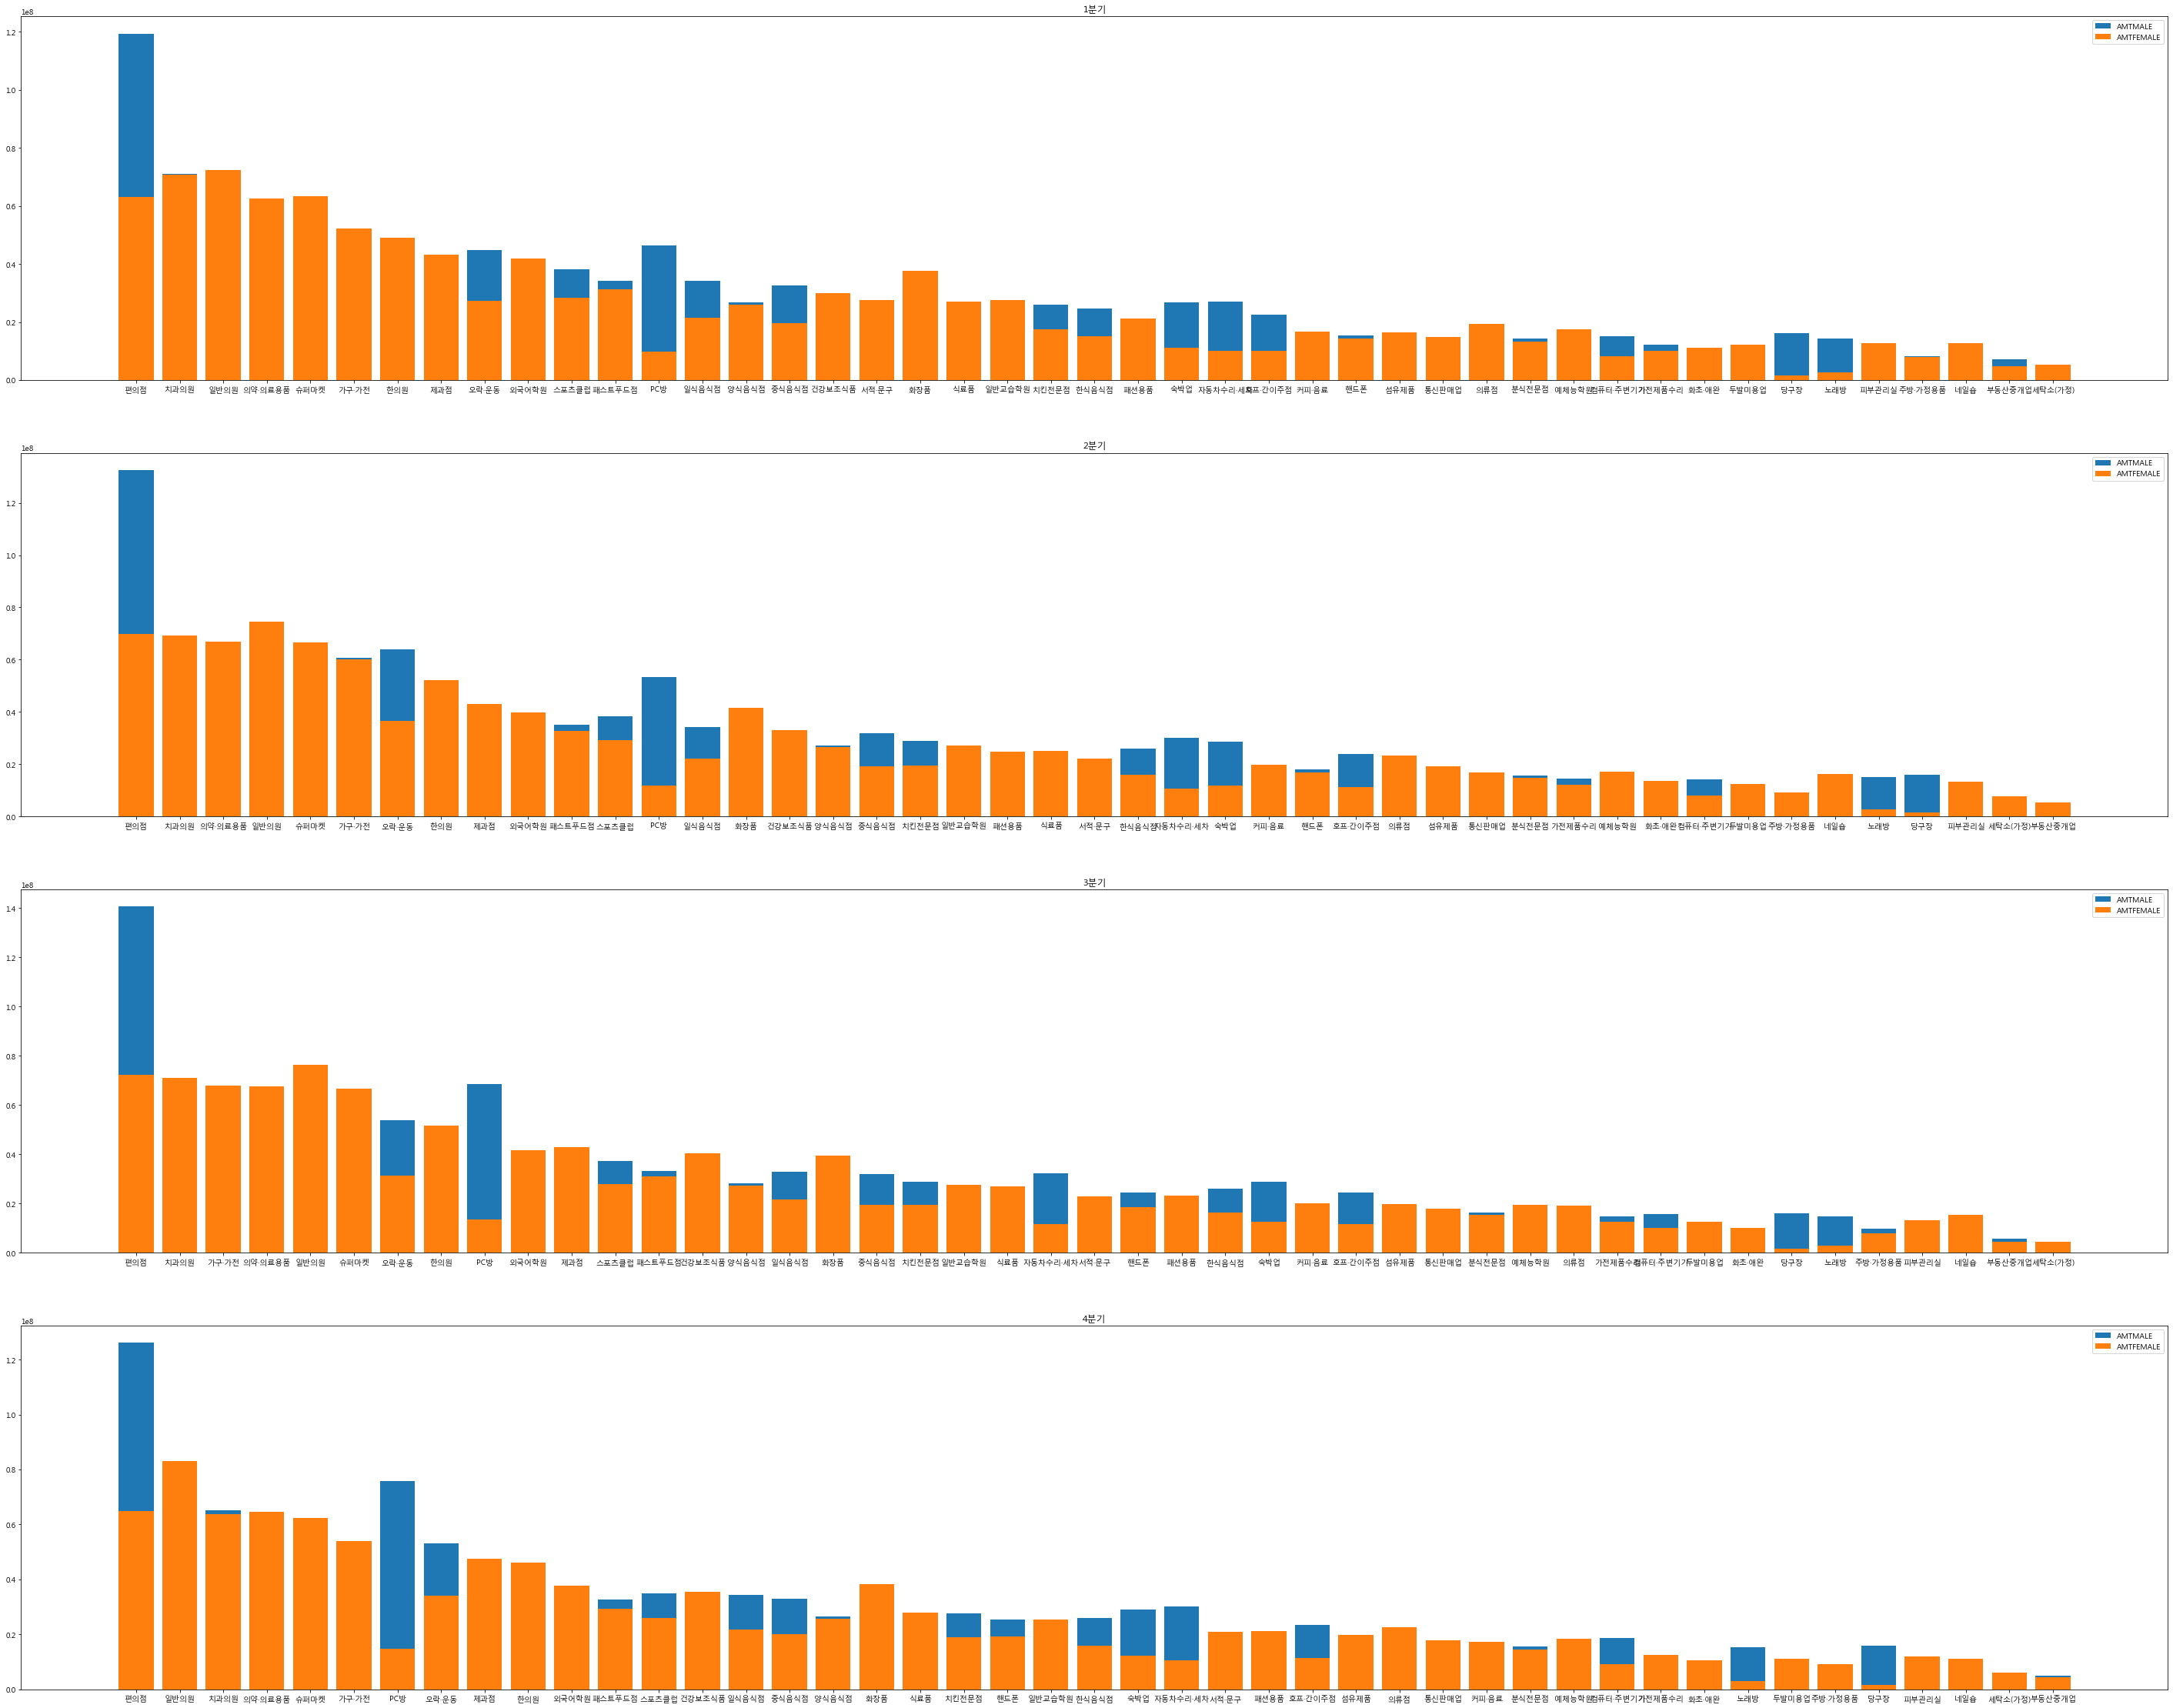

In [25]:
fig = plt.figure(figsize=(50, 40)) 

axes1 = fig.add_subplot(4,1,1)
axes2 = fig.add_subplot(4,1,2)
axes3 = fig.add_subplot(4,1,3)
axes4 = fig.add_subplot(4,1,4)

axes1.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTMALE,label='AMTMALE') 
axes1.legend(loc='upper right')
axes1.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTFEMALE,label='AMTFEMALE')
axes1.legend(loc='upper right')

axes2.bar(df_analysis_gender2.SE_NAME, df_analysis_gender2.AMTMALE,label='AMTMALE') 
axes2.legend(loc='upper right')
axes2.bar(df_analysis_gender2.SE_NAME, df_analysis_gender2.AMTFEMALE,label='AMTFEMALE')
axes2.legend(loc='upper right')

axes3.bar(df_analysis_gender3.SE_NAME, df_analysis_gender3.AMTMALE,label='AMTMALE') 
axes3.legend(loc='upper right')
axes3.bar(df_analysis_gender3.SE_NAME, df_analysis_gender3.AMTFEMALE,label='AMTFEMALE')
axes3.legend(loc='upper right')

axes4.bar(df_analysis_gender4.SE_NAME, df_analysis_gender4.AMTMALE,label='AMTMALE') 
axes4.legend(loc='upper right')
axes4.bar(df_analysis_gender4.SE_NAME, df_analysis_gender4.AMTFEMALE,label='AMTFEMALE')
axes4.legend(loc='upper right')

axes1.set_title("1분기") 
axes2.set_title("2분기")
axes3.set_title("3분기") 
axes4.set_title("4분기")



Text(0.5, 1.0, '4분기')

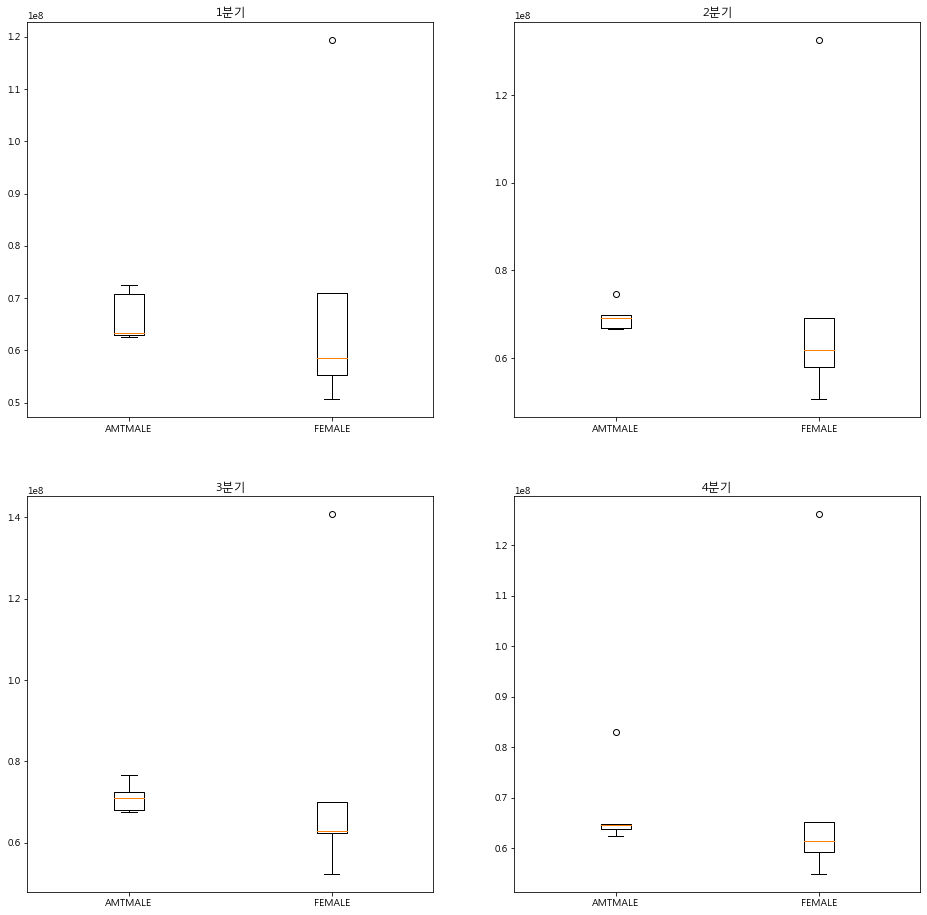

In [151]:
fig = plt.figure(figsize=(16, 16)) 

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.boxplot([df_analysis_gender1.AMTFEMALE, df_analysis_gender1.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes2.boxplot([df_analysis_gender2.AMTFEMALE, df_analysis_gender2.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes3.boxplot([df_analysis_gender3.AMTFEMALE, df_analysis_gender3.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes4.boxplot([df_analysis_gender4.AMTFEMALE, df_analysis_gender4.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes1.set_title("1분기") 
axes2.set_title("2분기")
axes3.set_title("3분기") 
axes4.set_title("4분기")

In [150]:
df_analysis_gender1

,SE_NAME,AMTMALE,AMTFEMALE,AMTAVG
0,편의점,1.193603e+08,6.303694e+07,9.119860e+07
1,치과의원,7.099878e+07,7.084671e+07,7.092274e+07
2,일반의원,5.062172e+07,7.241280e+07,6.151726e+07
3,의약·의료용품,5.860943e+07,6.258018e+07,6.059481e+07
4,슈퍼마켓,5.533119e+07,6.330716e+07,5.931917e+07
